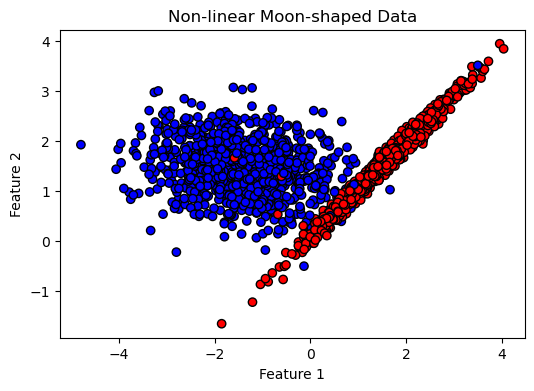

In [33]:
#1. Synthetic data for Linear Separable data
#function for Linearly separable data (make_classification)
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

def generate_linear_separable_data(n_samples=2000,n_features=2,class_sep=1.5,random_state=42):
    """
    Generate linearly separable classification data.

    Parameters:
        n_samples (int): Total number of samples.
        n_features (int): Number of features (>= 2 for plotting).
        class_sep (float): Separation between classes.
        random_state (int): Random seed for reproducibility.

    Returns:
        X (ndarray): Feature matrix of shape (n_samples, n_features).
        y (ndarray): Target labels (0 or 1).
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_features,
        n_redundant=0,
        n_clusters_per_class=1,
        class_sep=class_sep,
        random_state=random_state
    )
    return X, y

X, y = generate_linear_separable_data()
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Non-linear Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

#Scaling 
# 3️⃣ Standard scaling (fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train SVM classifiers with different kernels: 'linear', 'poly', 'rbf', 'sigmoid' 
from sklearn.svm import SVC

def train_svm_models(X_train, y_train, degree=3, C=1.0):
    """
    Train SVM classifiers with different kernels and return them in a dictionary.

    Parameters:
        X_train (ndarray): Training feature matrix.
        y_train (ndarray): Training labels.
        degree (int): Degree for polynomial kernel (default=3).
        C (float): Regularization parameter for all SVMs.

    Returns:
        dict: A dictionary where keys are kernel names and values are trained SVC models.
    """
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    models = {}

    for kernel in kernels:
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=degree, C=C)
        else:
            model = SVC(kernel=kernel, C=C)
        
        model.fit(X_train, y_train)
        models[kernel] = model
    
    return models

In [14]:
svm_models = train_svm_models(X_train_scaled, y_train)
# Display trained model types
for kernel, model in svm_models.items():
    print(f"{kernel} kernel -> Trained model: {model}")

linear kernel -> Trained model: SVC(kernel='linear')
poly kernel -> Trained model: SVC(kernel='poly')
rbf kernel -> Trained model: SVC()
sigmoid kernel -> Trained model: SVC(kernel='sigmoid')


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def tune_svm_hyperparameters(X_train, y_train, cv=5):
    """
    Perform hyperparameter tuning for different SVM kernels using GridSearchCV.

    Parameters:
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        cv (int): Number of cross-validation folds.

    Returns:
        dict: Best estimator per kernel.
    """
    param_grids = {
        'linear': {
            'C': [0.1, 1, 10, 100]
        },
        'poly': {
            'C': [0.1, 1, 10],
            'degree': [2, 3, 4]
        },
        'rbf': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        },
        'sigmoid': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }
    }

    best_models = {}

    for kernel, params in param_grids.items():
        svc = SVC(kernel=kernel)
        grid_search = GridSearchCV(svc, params, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[kernel] = grid_search.best_estimator_
        print(f"[{kernel.upper()}] Best params: {grid_search.best_params_} | Best score: {grid_search.best_score_:.4f}")

    return best_models



[LINEAR] Best params: {'C': 100} | Best score: 0.9838
[POLY] Best params: {'C': 10, 'degree': 3} | Best score: 0.9869
[RBF] Best params: {'C': 10, 'gamma': 1} | Best score: 0.9850
[SIGMOID] Best params: {'C': 10, 'gamma': 0.01} | Best score: 0.9731

=== LINEAR Kernel ===
Accuracy: 0.9900
Precision: 0.9852
Recall: 0.9950
F1-score: 0.9901


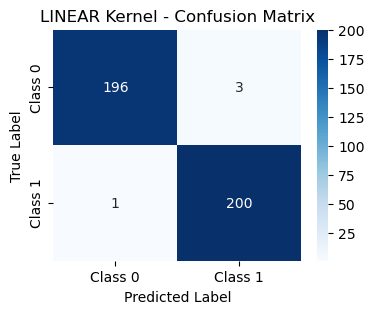

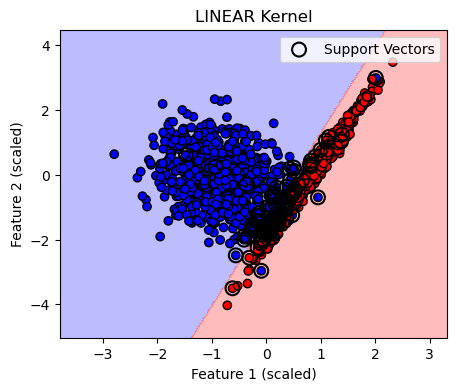


=== POLY Kernel ===
Accuracy: 0.9925
Precision: 0.9901
Recall: 0.9950
F1-score: 0.9926


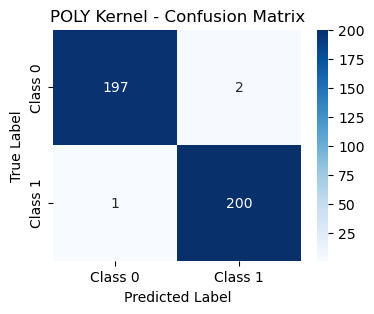

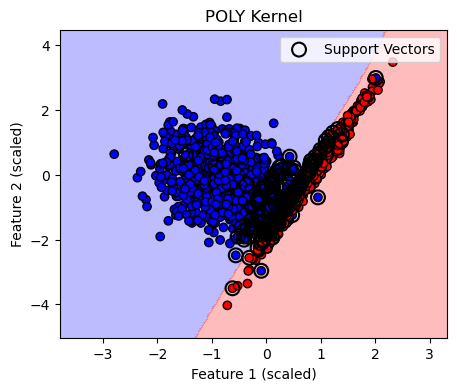


=== RBF Kernel ===
Accuracy: 0.9925
Precision: 0.9901
Recall: 0.9950
F1-score: 0.9926


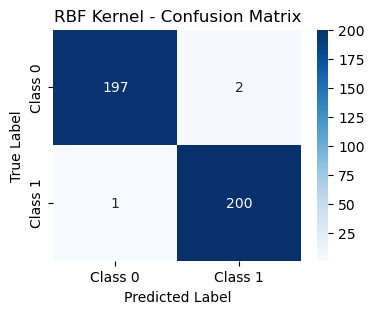

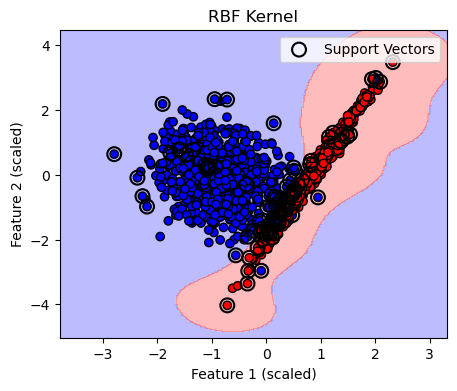


=== SIGMOID Kernel ===
Accuracy: 0.9800
Precision: 0.9662
Recall: 0.9950
F1-score: 0.9804


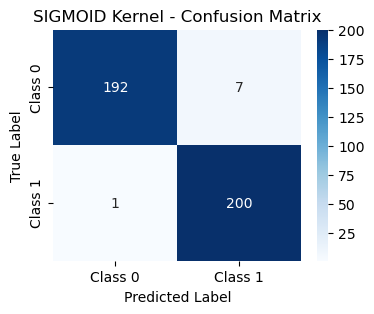

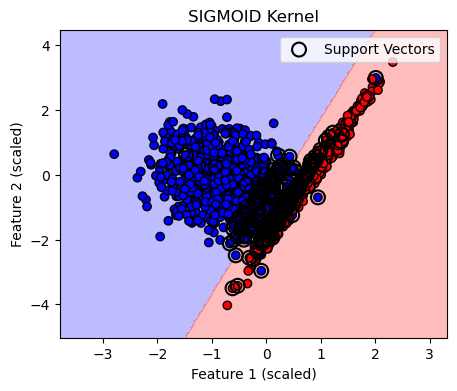

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

def evaluate_and_visualize(models, X_train, y_train, X_test, y_test):
    """
    Evaluate SVM models on test data and visualize confusion matrix + decision boundaries.

    Parameters:
        models (dict): Dictionary of trained SVM models per kernel.
        X_train, y_train: Training set.
        X_test, y_test: Test set.
    """
    results = {}

    for kernel, model in models.items():
        print(f"\n=== {kernel.upper()} Kernel ===")
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Metrics
        acc = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', zero_division=0
        )
        
        results[kernel] = {
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'])
        plt.title(f"{kernel.upper()} Kernel - Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()
        
        # Decision Boundary (2D only)
        if X_train.shape[1] == 2:
            plt.figure(figsize=(5, 4))
            plot_decision_boundary(model, X_train, y_train, title=f"{kernel.upper()} Kernel")
            plt.show()
    
    return results


def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """
    Plot decision boundary for a trained SVM model with 2D features.
    Highlights support vectors.
    """
    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    
    # Predictions for grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0], 
        model.support_vectors_[:, 1], 
        s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors'
    )
    
    plt.title(title)
    plt.legend()
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")


# ===== Example workflow ====


# Hyperparameter tuning
best_svm_models = tune_svm_hyperparameters(X_train_scaled, y_train)

# Evaluation & visualization
metrics_results = evaluate_and_visualize(best_svm_models, X_train_scaled, y_train, X_test_scaled, y_test)


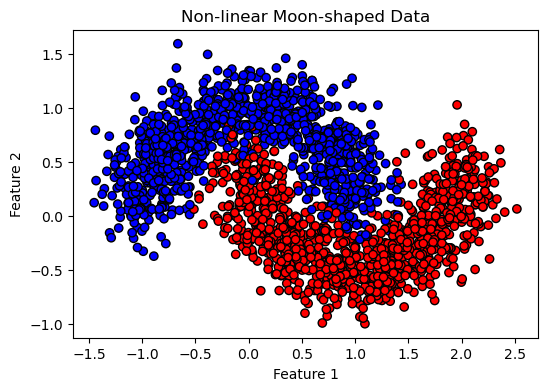

In [1]:
#1. Synthetic data for Non-linear moon data (make_moons)
# Function to generate synthetic data for Non linar moon data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

def generate_moon_data(n_samples, noise, random_state):
    """
    Generate synthetic non-linear moon-shaped classification data.

    Parameters:
        n_samples (int): Total number of samples.
        noise (float): Standard deviation of Gaussian noise added to the data.
        random_state (int): Random seed for reproducibility.

    Returns:
        X (ndarray): Feature matrix of shape (n_samples, 2).
        y (ndarray): Target labels (0 or 1).
    """
    X, y = make_moons(
        n_samples=n_samples,
        noise=noise,
        random_state=random_state
    )
    return X, y
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Non-linear Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

#Scaling 
# 3️⃣ Standard scaling (fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.svm import SVC

def train_svm_models(X_train, y_train, degree=3, C=1.0):
    """
    Train SVM classifiers with different kernels and return them in a dictionary.

    Parameters:
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        degree (int): Degree for polynomial kernel (default=3).
        C (float): Regularization parameter for all SVMs.

    Returns:
        dict: Dictionary {kernel_name: trained_model}.
    """
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    models = {}

    for kernel in kernels:
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=degree, C=C)
        else:
            model = SVC(kernel=kernel, C=C)
        
        model.fit(X_train, y_train)
        models[kernel] = model
    
    return models


In [6]:
svm_models = train_svm_models(X_train_scaled, y_train)
# Show trained models
for kernel, model in svm_models.items():
    print(f"{kernel} kernel -> Trained model: {model}")

linear kernel -> Trained model: SVC(kernel='linear')
poly kernel -> Trained model: SVC(kernel='poly')
rbf kernel -> Trained model: SVC()
sigmoid kernel -> Trained model: SVC(kernel='sigmoid')


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def tune_svm_hyperparameters(X_train, y_train, cv=5):
    """
    Perform hyperparameter tuning for different SVM kernels using GridSearchCV.

    Parameters:
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        cv (int): Number of cross-validation folds.

    Returns:
        dict: Best estimator per kernel.
    """
    # Define parameter grids for each kernel
    param_grids = {
        'linear': {
            'C': [0.1, 1, 10, 100]
        },
        'poly': {
            'C': [0.1, 1, 10],
            'degree': [2, 3, 4]
        },
        'rbf': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        },
        'sigmoid': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }
    }

    best_models = {}

    # Loop through kernels and run GridSearch
    for kernel, params in param_grids.items():
        svc = SVC(kernel=kernel)
        grid_search = GridSearchCV(
            svc, params, cv=cv, scoring='accuracy', n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_models[kernel] = grid_search.best_estimator_

        print(f"[{kernel.upper()}] Best params: {grid_search.best_params_} | "
              f"Best CV score: {grid_search.best_score_:.4f}")

    return best_models


# Tune hyperparameters
best_svm_models = tune_svm_hyperparameters(X_train_scaled, y_train)


[LINEAR] Best params: {'C': 1} | Best CV score: 0.8694
[POLY] Best params: {'C': 1, 'degree': 3} | Best CV score: 0.8681
[RBF] Best params: {'C': 10, 'gamma': 1} | Best CV score: 0.9719
[SIGMOID] Best params: {'C': 10, 'gamma': 0.01} | Best CV score: 0.8688



=== LINEAR Kernel ===
Accuracy:  0.8800
Precision: 0.8818
Recall:    0.8818
F1-score:  0.8818


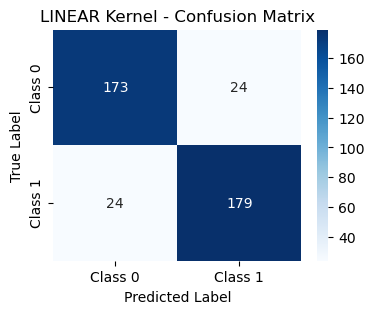

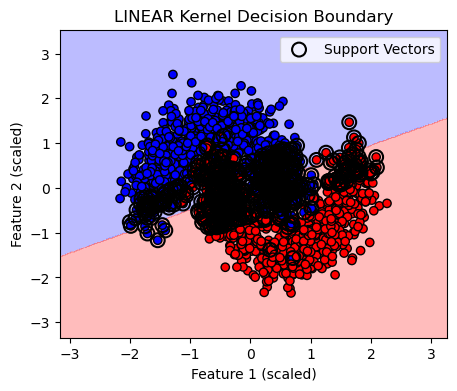


=== POLY Kernel ===
Accuracy:  0.8775
Precision: 0.8812
Recall:    0.8768
F1-score:  0.8790


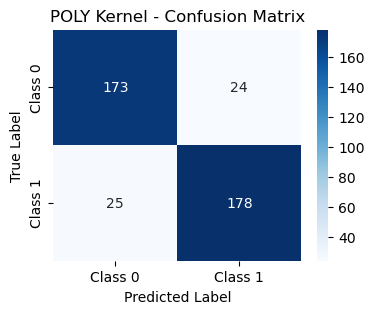

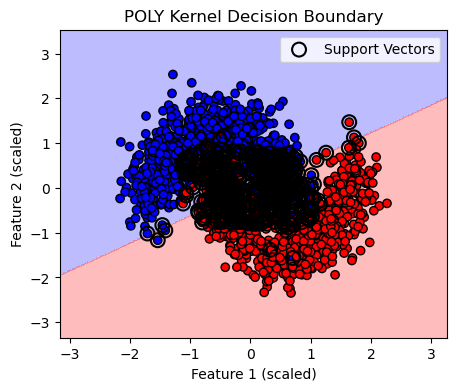


=== RBF Kernel ===
Accuracy:  0.9650
Precision: 0.9749
Recall:    0.9557
F1-score:  0.9652


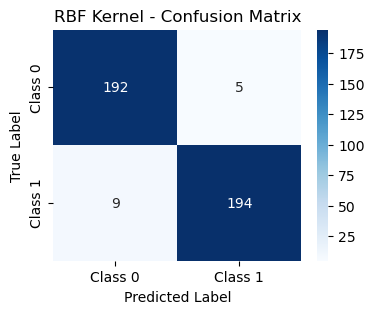

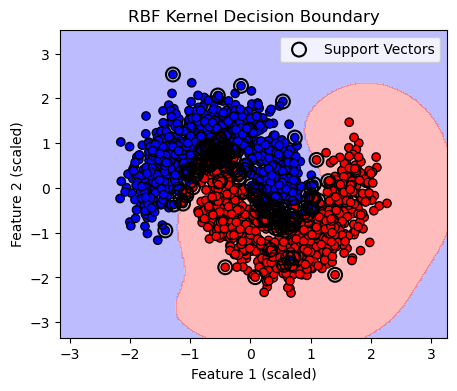


=== SIGMOID Kernel ===
Accuracy:  0.8775
Precision: 0.8812
Recall:    0.8768
F1-score:  0.8790


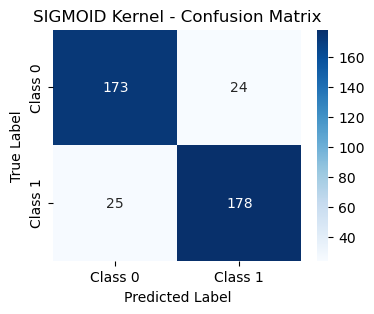

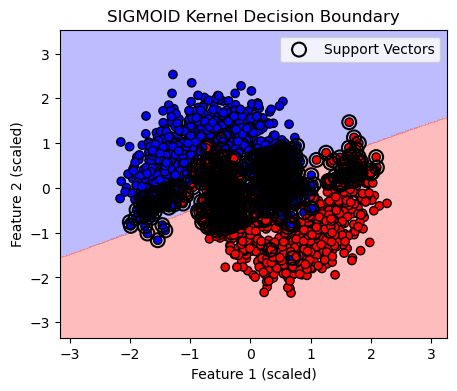

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

def evaluate_and_visualize(models, X_train, y_train, X_test, y_test):
    """
    Evaluate SVM models on test data and visualize confusion matrix + decision boundaries.

    Parameters:
        models (dict): Dictionary {kernel: trained_model}.
        X_train, y_train: Training data.
        X_test, y_test: Test data.
    """
    results = {}

    for kernel, model in models.items():
        print(f"\n=== {kernel.upper()} Kernel ===")

        # Predictions
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', zero_division=0
        )

        results[kernel] = {
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1-score:  {f1:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'])
        plt.title(f"{kernel.upper()} Kernel - Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

        # Decision Boundary
        if X_train.shape[1] == 2:
            plt.figure(figsize=(5, 4))
            plot_decision_boundary(model, X_train, y_train,
                                title=f"{kernel.upper()} Kernel Decision Boundary")
            plt.show()

    return results


def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """
    Plot decision boundary for a trained SVM model with 2D features.
    Highlights support vectors.
    """
    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Predictions for meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k',
                linewidths=1.5, label='Support Vectors')

    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.legend()
  # Evaluate & visualize
results = evaluate_and_visualize(best_svm_models, X_train_scaled, y_train, X_test_scaled, y_test)

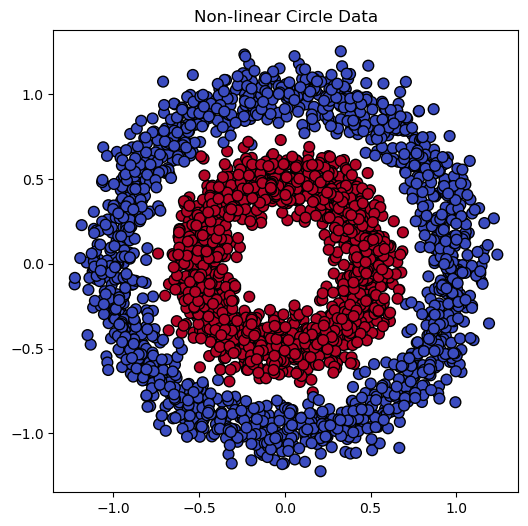

In [13]:
#Function for Non-linear circle data (make_circles)
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

def generate_nonlinear_circle_data(n_samples=3000, noise=0.09, factor=0.5, random_state=42, plot=False):
    """
    Generates synthetic non-linear circle data.
    
    Parameters:
        n_samples (int): Number of samples.
        noise (float): Standard deviation of Gaussian noise.
        factor (float): Scale factor between inner and outer circle.
        random_state (int): Random seed.
        plot (bool): If True, plots the generated data.

    Returns:
        X (ndarray): Features array.
        y (ndarray): Target labels.
    """
    X, y = make_circles(n_samples=n_samples, noise=noise, factor=factor, random_state=random_state)
    
    if plot:
        plt.figure(figsize=(6, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=60)
        plt.title("Non-linear Circle Data")
        plt.show()
    
    return X, y

# Example usage:
X, y = generate_nonlinear_circle_data(plot=True)


In [15]:
  # Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Scale features (fit on train, transform on both train/test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
svm_models = train_svm_models(X_train_scaled, y_train)
# Show trained models
for kernel, model in svm_models.items():
    print(f"{kernel} kernel -> Trained model: {model}")


linear kernel -> Trained model: SVC(kernel='linear')
poly kernel -> Trained model: SVC(kernel='poly')
rbf kernel -> Trained model: SVC()
sigmoid kernel -> Trained model: SVC(kernel='sigmoid')


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def tune_svm_hyperparameters(X_train, y_train, cv=5):
    """
    Perform hyperparameter tuning for different SVM kernels using GridSearchCV.

    Parameters:
        X_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        cv (int): Number of cross-validation folds.

    Returns:
        dict: Best estimator per kernel.
    """
    # Define parameter grids for each kernel
    param_grids = {
        'linear': {
            'C': [0.1, 1, 10, 100]
        },
        'poly': {
            'C': [0.1, 1, 10],
            'degree': [2, 3, 4]
        },
        'rbf': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        },
        'sigmoid': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }
    }

    best_models = {}

    # Loop through kernels and run GridSearch
    for kernel, params in param_grids.items():
        svc = SVC(kernel=kernel)
        grid_search = GridSearchCV(
            svc, params, cv=cv, scoring='accuracy', n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_models[kernel] = grid_search.best_estimator_

        print(f"[{kernel.upper()}] Best params: {grid_search.best_params_} | "
              f"Best CV score: {grid_search.best_score_:.4f}")

    return best_models


# Tune hyperparameters
best_svm_models = tune_svm_hyperparameters(X_train_scaled, y_train)


[LINEAR] Best params: {'C': 1} | Best CV score: 0.5379
[POLY] Best params: {'C': 10, 'degree': 2} | Best CV score: 0.9979
[RBF] Best params: {'C': 10, 'gamma': 0.01} | Best CV score: 0.9979
[SIGMOID] Best params: {'C': 10, 'gamma': 0.1} | Best CV score: 0.6275



=== LINEAR Kernel ===
Accuracy:  0.5383
Precision: 0.5319
Recall:    0.6400
F1-score:  0.5809


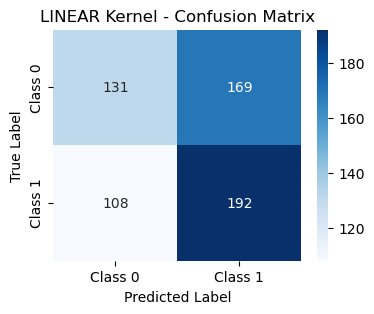

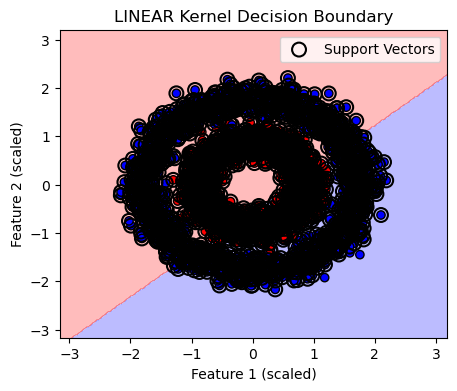


=== POLY Kernel ===
Accuracy:  0.9983
Precision: 1.0000
Recall:    0.9967
F1-score:  0.9983


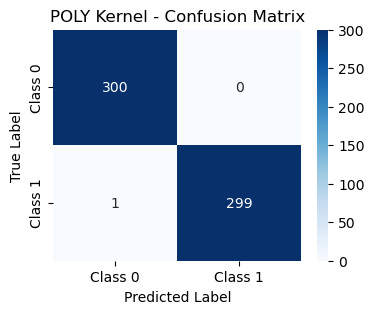

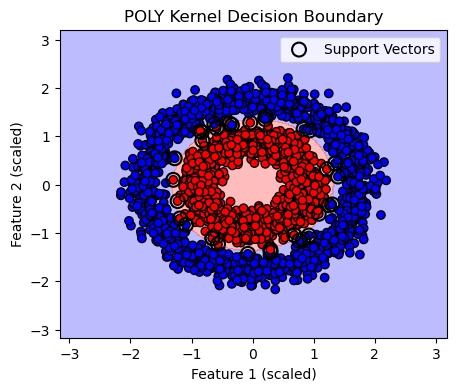


=== RBF Kernel ===
Accuracy:  0.9967
Precision: 0.9934
Recall:    1.0000
F1-score:  0.9967


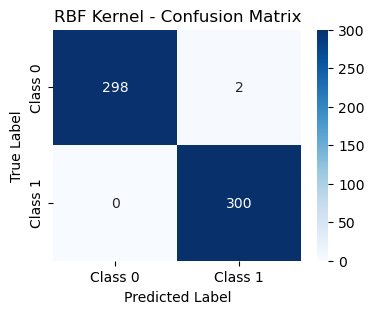

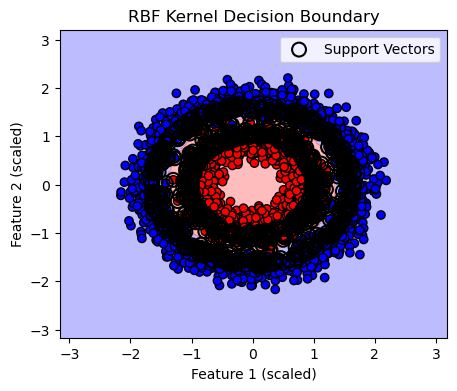


=== SIGMOID Kernel ===
Accuracy:  0.6333
Precision: 0.6064
Recall:    0.7600
F1-score:  0.6746


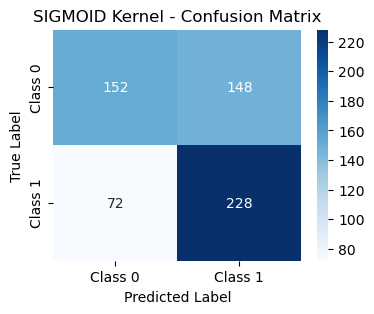

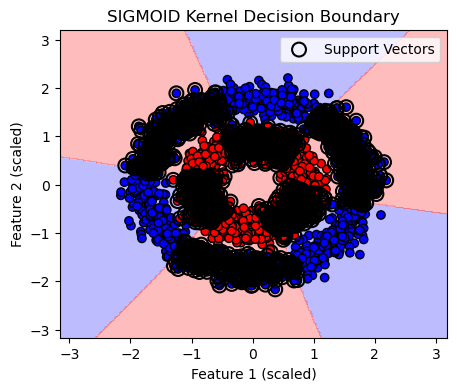

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

def evaluate_and_visualize(models, X_train, y_train, X_test, y_test):
    """
    Evaluate SVM models on test data and visualize confusion matrix + decision boundaries.

    Parameters:
        models (dict): Dictionary {kernel: trained_model}.
        X_train, y_train: Training data.
        X_test, y_test: Test data.
    """
    results = {}

    for kernel, model in models.items():
        print(f"\n=== {kernel.upper()} Kernel ===")

        # Predictions
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', zero_division=0
        )

        results[kernel] = {
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1-score:  {f1:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'])
        plt.title(f"{kernel.upper()} Kernel - Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

        # Decision Boundary
        if X_train.shape[1] == 2:
            plt.figure(figsize=(5, 4))
            plot_decision_boundary(model, X_train, y_train,
                                   title=f"{kernel.upper()} Kernel Decision Boundary")
            plt.show()

    return results


def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """
    Plot decision boundary for a trained SVM model with 2D features.
    Highlights support vectors.
    """
    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Predictions for meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k',
                linewidths=1.5, label='Support Vectors')

    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.legend()
  # Evaluate & visualize
results = evaluate_and_visualize(best_svm_models, X_train_scaled, y_train, X_test_scaled, y_test)